## Principal Component Analysis (PCA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import uniform
from scipy.spatial.transform import Rotation as R

### Note: The PCA stuff doesn't begin until 'Now run PCA ...' (below).
The code before that is just making a data set that helps visualize what PCA does.

### Make fake data that we can keep track of before and after PCA runs:
 
- Make 3D points $\{(x, y, z)\}$. First choose each coordinate randomly from Uniform(0, 1).
- Color each point with the RGB ("red green blue") value Red=$x$, Green=$y$, Blue=$z$.
- Then multiply each $x$ by 4, each $y$ by 2, and each $z$ by 1 so that there is more variance along the Red dimension than along Green, and more along Green than Blue.
- (Then we will see whether PCA recovers the higher-variance dimensions.)

In [5]:
N = 200
(X_SCALE, Y_SCALE, Z_SCALE) = (4, 2, 1)
np.random.seed(0)
Red = uniform.rvs(loc=0, scale=1, size=N) # N random points from [loc, loc + scale]
x = Red * X_SCALE
Green = uniform.rvs(loc=0, scale=1, size=N) # N random points from [loc, loc + scale]
y = Green * Y_SCALE
Blue = uniform.rvs(loc=0, scale=1, size=N) # N random points from [loc, loc + scale]
z = Blue * Z_SCALE
RGB_colors = np.stack((Red, Green, Blue), axis=1)
print(f'RGB_colors.shape={RGB_colors.shape}')
print(f'RGB_colors[0:3, :]={RGB_colors[0:3, :]}')

X = pd.DataFrame({'x': x, 'y': y, 'z': z})
X.describe().iloc[[0, 2, 3, 7], :]

RGB_colors.shape=(200, 3)
RGB_colors[0:3, :]=[[0.5488135  0.31179588 0.4012595 ]
 [0.71518937 0.69634349 0.92929142]
 [0.60276338 0.37775184 0.09961493]]


,x,y,z
count,200.000000,200.000000,200.000000
std,1.138505,0.589202,0.301947
min,0.018782,0.022855,0.002703
max,3.995388,1.980678,0.997962


### Translate and rotate the data to make a mess (optional).
- Try the whole notebook with `translate_and_rotate_data = False` for an easy-to-understand case.
- Try again with `translate_and_rotate_data = True` for a more realistic case.

In [7]:
translate_and_rotate_data = False
if translate_and_rotate_data:
    theta = np.pi/6
    R_x = R.from_matrix([[1, 0, 0],
                         [0, np.cos(theta), -np.sin(theta)],
                         [0, np.sin(theta), np.cos(theta)]])
    R_y = R.from_matrix([[np.cos(theta), 0, np.sin(theta)],
                         [0, 1, 0],
                         [-np.sin(theta), 0, np.cos(theta)]])
    R_z = R.from_matrix([[np.cos(theta), -np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta), 0],
                         [0, 0, 1]])
    X.x += 1 # translate
    X.y += 2
    X = R_x.apply(X) # rotate
    X = R_y.apply(X)
    X = R_z.apply(X)
    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]

### Graph the data from several perspectives.
- RGB colors are additive. Secondary colors include:
  - Yellow = Red + Green
  - Magenta = Red + Blue
  - Cyan = Green + Blue
- Notice the Red dimension has most variance, then Green, then Blue.


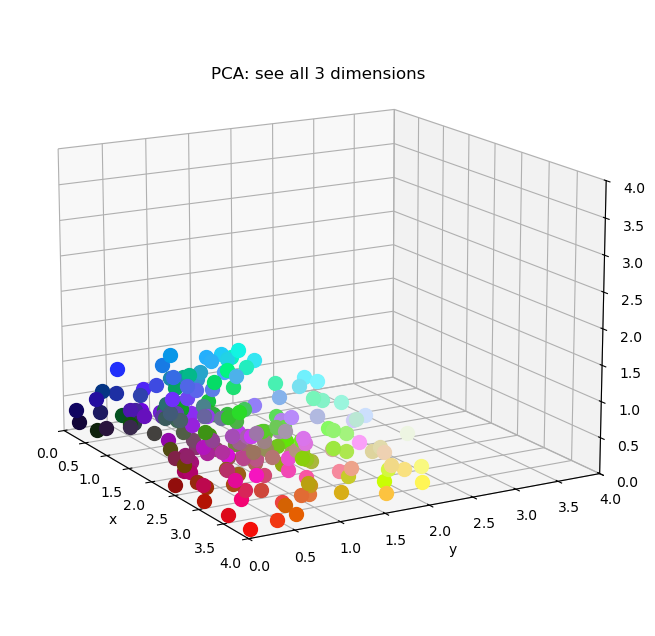

In [9]:
def plot_PCA_data(x, y, z, title, elev=0, azim=0):
    fig = plt.figure(figsize=(8, 8)) # (width, height) in inches
    ax  = fig.add_subplot(111, projection='3d') # 111 => nrows=1, ncols=1, index=1
    for i in range(len(x)):
        ax.plot3D(x[i], y[i], z[i], 'o', c=RGB_colors[i, :], markersize=10) # 'o' = circle

    ax.set_xlim(left=0, right=X_SCALE)
    ax.set_ylim(bottom=0, top=X_SCALE)
    ax.set_zlim(0, X_SCALE)
    ax.set_title(title, y=0.95) # y=1.0 is top of plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=elev, azim=azim)
    plt.show(block=False)

plot_PCA_data(x=x, y=y, z=z, title='PCA: see all 3 dimensions', elev=15, azim=-30) # shows x in [0, 4], y in [0, 2], and z in [0, 1]
if False: # change to True to see three more views, one along each axis
    plot_PCA_data(x=x, y=y, z=z, title='PCA: look along x-axis at y and z', elev= 0, azim=  0)
    plot_PCA_data(x=x, y=y, z=z, title='PCA: look along y-axis at x and z', elev= 0, azim= 90)
    plot_PCA_data(x=x, y=y, z=z, title='PCA: look along z-axis at x and y', elev=-90, azim=-90) # similar to PCA result

### Now run PCA to find 2 principal components.
Notice the Red and Green dimensions, those with highest variance, are recovered.

pca.explained_variance_ratio_=[0.74811775 0.19952834]


,Red,Green,Blue
0,0.999248,-0.038417,-0.005335
1,0.038584,0.998611,0.035867


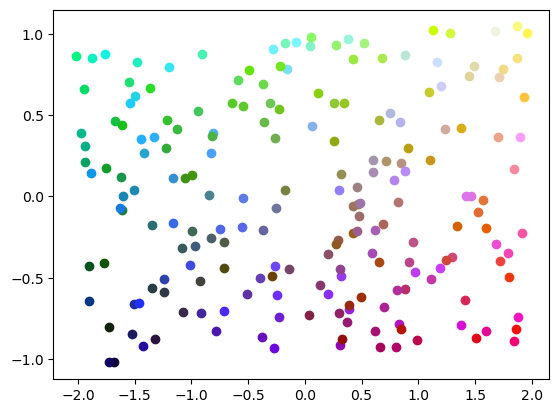

In [11]:
pca = PCA(n_components=2, random_state=0) # also try n_components=3
pca.fit(X)
print(f'pca.explained_variance_ratio_={pca.explained_variance_ratio_}')
pca_X = pca.transform(X)
for i in range(pca_X.shape[0]):
    plt.plot(pca_X[i, 0], pca_X[i, 1], 'o', c=RGB_colors[i, :])

pca_display_df = pd.DataFrame(pca.components_, columns=('Red', 'Green', 'Blue'))
display(pca_display_df) # display() makes it prettier than print()

### And run PCA to find just 1 principal component.
Notice the Red dimension, the one with highest variance, is recovered.

pca.explained_variance_ratio_=[0.74811775]


,Red,Green,Blue
0,0.999248,-0.038417,-0.005335


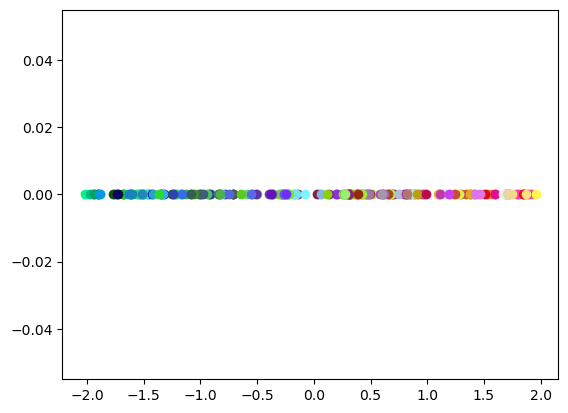

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
print(f'pca.explained_variance_ratio_={pca.explained_variance_ratio_}')
pca_X = pca.transform(X)
for i in range(pca_X.shape[0]):
    plt.plot(pca_X[i, 0], 0, 'o', c=RGB_colors[i, :])

pca_display_df = pd.DataFrame(pca.components_, columns=('Red', 'Green', 'Blue'))
display(pca_display_df) # display() makes it prettier than print()

### PCA is sensitive to feature scaling.
Here we standardize each feature before running PCA.
- For the `translate_and_rotate_data = False` case where standardizing makes
  variability in each of the Red, Green, and Blue directions the same ($\sigma = 1$),
  there is no longer a preferred first PC, so a random one is chosen, and then the
  second is orthogonal to it.
- For the `translate_and_rotate_data = True` case, standardizing leaves the Red
  dimension as the most variable (and Green second and Blue last), so PCA chooses
  the Red direction for the first PC and then the Green direction for the second.

pca.explained_variance_ratio_=[0.3617179  0.32744065]


,Red,Green,Blue
0,-0.533367,0.664882,0.522926
1,0.695030,-0.007888,0.718937


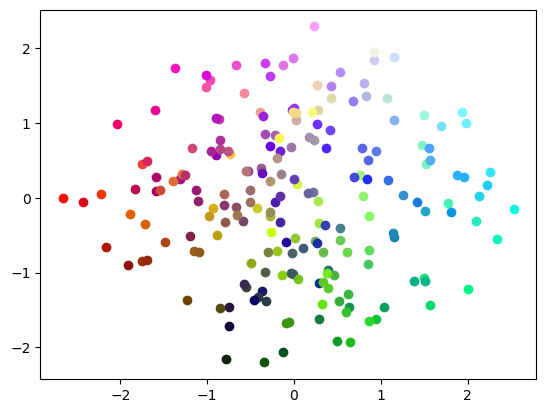

In [15]:
from sklearn.pipeline import make_pipeline # move this line up by other imports
from sklearn.preprocessing import StandardScaler # move this line up by other imports

std_pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
std_pca.fit(X)
pca = std_pca.named_steps['pca'] # get PCA from pipeline
print(f'pca.explained_variance_ratio_={pca.explained_variance_ratio_}')
pca_X = std_pca.transform(X)
for i in range(pca_X.shape[0]):
    plt.plot(pca_X[i, 0], pca_X[i, 1], 'o', c=RGB_colors[i, :])

pca_display_df = pd.DataFrame(pca.components_, columns=('Red', 'Green', 'Blue'))
display(pca_display_df) # display() makes it pretty; print() is less pretty

#### Note:
 My fake data set has three uncorrelated features. In a more typical data set with many features
with a lot of correlation between features, PCA can extract a few uncorrelated features that
retain most of the variation in the data.